In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
heart_disease_data = pd.read_csv('./heart_cleveland_upload.csv')

In [22]:
heart_disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [24]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

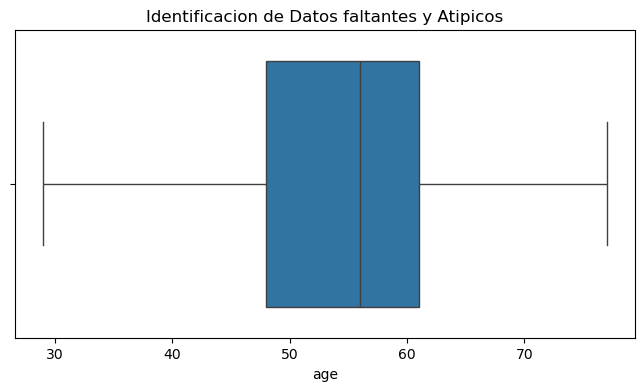

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(x=heart_disease_data['age'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=12)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

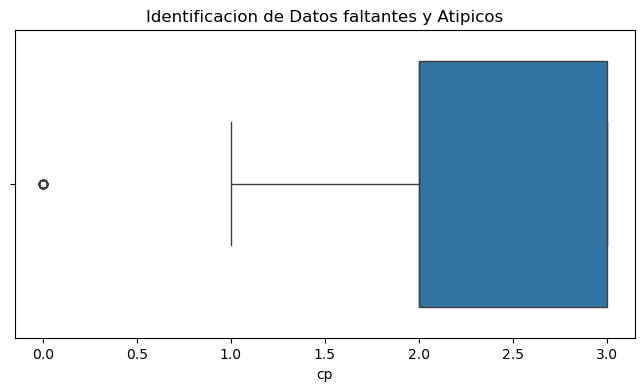

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(x=heart_disease_data['cp'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=12)

In [33]:
print("Cantidad de Registros con cero en cp: ",heart_disease_data['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",heart_disease_data['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",heart_disease_data['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",heart_disease_data['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",heart_disease_data['slope'].isin([0]).sum())

Cantidad de Registros con cero en cp:  23
Cantidad de Registros con cero en oldpeak:  96
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en slope:  139


In [37]:
heart_disease_data['cp']=heart_disease_data['cp'].replace(0,heart_disease_data['cp'].mean())
heart_disease_data['oldpeak']=heart_disease_data['oldpeak'].replace(0,heart_disease_data['oldpeak'].mean())
heart_disease_data['slope']=heart_disease_data['slope'].replace(0,heart_disease_data['slope'].mean())
heart_disease_data['ca']=heart_disease_data['ca'].replace(0,heart_disease_data['ca'].mean())
heart_disease_data['thal']=heart_disease_data['thal'].replace(0,heart_disease_data['thal'].mean())

In [39]:
print("Cantidad de Registros con cero en cp: ",heart_disease_data['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",heart_disease_data['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",heart_disease_data['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",heart_disease_data['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",heart_disease_data['slope'].isin([0]).sum())

Cantidad de Registros con cero en cp:  0
Cantidad de Registros con cero en oldpeak:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en slope:  0


In [41]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    float64
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    float64
 11  ca         297 non-null    float64
 12  thal       297 non-null    float64
 13  condition  297 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 32.6 KB


In [45]:
heart_disease_data['sex'].value_counts()


sex
1    201
0     96
Name: count, dtype: int64

In [47]:
print("sex_masculino=0,sex_femenino=1")

sex_masculino=0,sex_femenino=1


In [49]:
heart_disease_data[['sex']].head(20)

,sex
0,1
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [77]:
X= heart_disease_data.drop('sex',axis=1)
Y= heart_disease_data['sex']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [79]:
print (X_train)

     age        cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
140   44  2.000000       140   235    0        2      180      0  1.055556   
85    65  2.000000       160   360    0        2      151      0  0.800000   
178   64  3.000000       180   325    0        0      154      1  1.055556   
159   68  3.000000       144   193    1        0      141      0  3.400000   
207   59  3.000000       135   234    0        0      161      0  0.500000   
..   ...       ...       ...   ...  ...      ...      ...    ...       ...   
273   46  3.000000       140   311    0        0      120      1  1.800000   
148   41  2.000000       112   250    0        0      179      0  1.055556   
231   57  3.000000       120   354    0        0      163      1  0.600000   
76    68  2.000000       180   274    1        2      150      1  1.600000   
17    51  2.158249       125   213    0        2      125      1  1.400000   

        slope        ca      thal  condition  
140  0.602694  0

In [81]:
print (Y_train)

140    1
85     0
178    0
159    1
207    1
      ..
273    1
148    1
231    0
76     1
17     1
Name: sex, Length: 222, dtype: int64


In [83]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train, Y_train)

Prediccion = modelo_regresion.predict(X_test)

In [85]:
print (Y_train)

140    1
85     0
178    0
159    1
207    1
      ..
273    1
148    1
231    0
76     1
17     1
Name: sex, Length: 222, dtype: int64


In [87]:
print (Prediccion)

[0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0]


In [101]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45        24
           1       0.75      0.86      0.80        51

    accuracy                           0.71        75
   macro avg       0.65      0.62      0.62        75
weighted avg       0.69      0.71      0.69        75



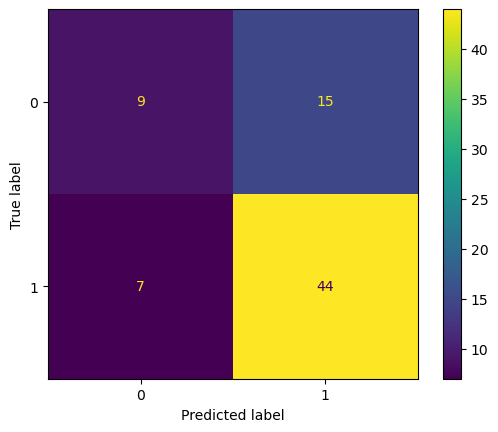

In [103]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

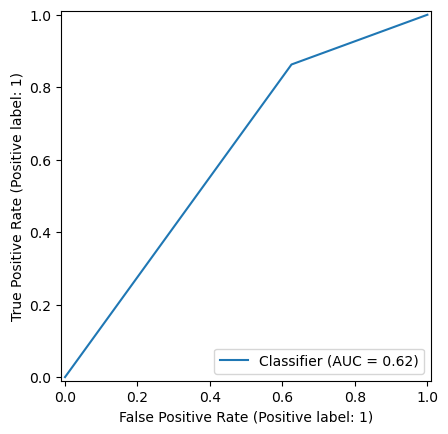

In [99]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()